# Ch03. A Tour of Machine Learning Classi ers Using Scikit-learn

In [1]:
!pip list

alabaster (0.7.9)
anaconda-clean (1.0)
anaconda-client (1.5.1)
anaconda-navigator (1.3.1)
argcomplete (1.0.0)
astroid (1.4.7)
astropy (1.2.1)
Babel (2.3.4)
backports.shutil-get-terminal-size (1.0.0)
beautifulsoup4 (4.5.1)
bitarray (0.8.1)
blaze (0.10.1)
bokeh (0.12.2)
boto (2.42.0)
Bottleneck (1.1.0)
cffi (1.7.0)
chest (0.2.3)
click (6.6)
cloudpickle (0.2.1)
clyent (1.2.2)
colorama (0.3.7)
comtypes (1.1.2)
conda (4.2.9)
conda-build (2.0.2)
configobj (5.0.6)
contextlib2 (0.5.3)
cryptography (1.5)
cycler (0.10.0)
Cython (0.24.1)
cytoolz (0.8.0)
dask (0.11.0)
datashape (0.5.2)
decorator (4.0.10)
dill (0.2.5)
docutils (0.12)
dynd (c328ab7)
et-xmlfile (1.0.1)
fastcache (1.0.2)
filelock (2.0.6)
Flask (0.11.1)
Flask-Cors (2.1.2)
gevent (1.1.2)
greenlet (0.4.10)
h5py (2.6.0)
HeapDict (1.0.0)
idna (2.1)
imagesize (0.7.1)
ipykernel (4.5.0)
ipython (5.1.0)
ipython-genutils (0.1.0)
ipywidgets (5.2.2)
itsdangerous (0.24)
jdcal (1.2)
jedi (0.9.0)
Jinja2 (2.8)
jsonschema (2.5.1)
jupyter (1.0.0)
jupyt

## 1. First steps with scikit-learn

In [66]:
!pip install --upgrade scikit-learn

  Found existing installation: scikit-learn 0.17.1
    Uninstalling scikit-learn-0.17.1:
      Successfully uninstalled scikit-learn-0.17.1


    DEPRECATION: Uninstalling a distutils installed project (scikit-learn) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.


In [67]:
!pip show scikit-learn

---
Metadata-Version: 2.0
Name: scikit-learn
Version: 0.18
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: Andreas Mueller
Author-email: amueller@ais.uni-bonn.de
Installer: pip
License: new BSD
Location: c:\program files\anaconda3\lib\site-packages
Requires: 
Classifiers:
  Intended Audience :: Science/Research
  Intended Audience :: Developers
  License :: OSI Approved
  Programming Language :: C
  Programming Language :: Python
  Topic :: Software Development
  Topic :: Scientific/Engineering
  Operating System :: Microsoft :: Windows
  Operating System :: POSIX
  Operating System :: Unix
  Operating System :: MacOS
  Programming Language :: Python :: 2
  Programming Language :: Python :: 2.6
  Programming Language :: Python :: 2.7
  Programming Language :: Python :: 3
  Programming Language :: Python :: 3.4
  Programming Language :: Python :: 3.5


### 1) Training a perceptron via scikit-learn

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris() # iris data 불러오기

In [3]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [4]:
# petal length와 petal width만 추출
X = iris.data[:,[2, 3]]
y = iris.target

In [5]:
np.unique(y)

array([0, 1, 2])

In [6]:
X.shape

(150, 2)

#### Data separation : Training and Test dataset

In [7]:
# training dataset과 test dataset으로 데이터 구분 (0.7 : training, 0.3 : test)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = 0)

In [8]:
X_train.shape, X_test.shape

((105, 2), (45, 2))

#### Standardize the features

In [69]:
from scipy.stats import skew
skew(X_train), skew(X_test)

(array([-0.27678258, -0.15494516]), array([-0.31158095, -0.00150012]))

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   6.,   9.,  10.,
           8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
           0.,   1.,   2.,   1.,   1.,   3.,   2.,   3.,   4.,   3.,   4.,
           4.,   2.,   3.,   9.,   2.,   4.,   1.,   4.,   6.,   2.,   1.,
           3.,   0.,   1.,   1.,   2.,   1.]),
  array([ 25.,   4.,   5.,   0.,   0.,   0.,   5.,   3.,  13.,   4.,   5.,
           5.,   8.,  10.,   5.,   2.,   9.,   2.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.])],
 array([ 0.1  ,  0.236,  0.372,  0.508,  0.644,  0.78 ,  0.916,  1.052,
         1.188,  1.324,  1.46 ,  1.596,  1.732,  1.868,  2.004,  2.14 ,
         2.276,  2.412,  2.548,  2.684,  2.82 ,  2.956,  3.092,  3.228,
         3.364,  3.5  ,  3.636,  3.772,  3.908,  4.044,  4.18 ,  4.316,
         4.452,  

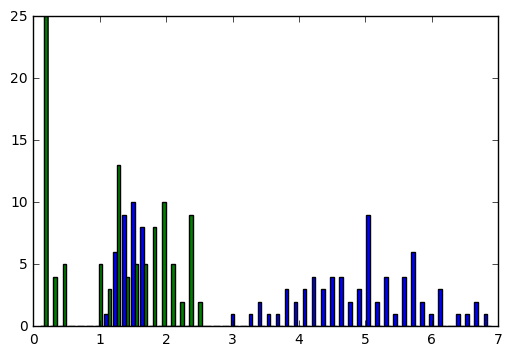

In [77]:
import matplotlib.pyplot as plt
plt.hist(X_train, bins = 50.0)

In [9]:
# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initailization
sc.fit(X_train) # 평균과 표준편차 구함

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
# Standardization
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
X_train_std

array([[-0.18295039, -0.29145882],
       [ 0.93066067,  0.73721938],
       [ 1.04202177,  1.6373128 ],
       [ 0.6522579 ,  0.35146505],
       [ 1.09770233,  0.73721938],
       [ 0.03977182, -0.16287405],
       [ 1.26474398,  1.38014325],
       [ 0.48521625,  0.48004983],
       [-0.01590873, -0.16287405],
       [ 0.59657735,  0.73721938],
       [ 0.70793846,  0.35146505],
       [ 0.37385514,  0.6086346 ],
       [ 0.6522579 ,  0.86580415],
       [ 0.48521625,  0.22288028],
       [ 0.76361901,  0.99438893],
       [ 0.37385514,  0.48004983],
       [-1.24088089, -1.32013702],
       [ 0.70793846,  0.86580415],
       [ 0.20681348,  0.0942955 ],
       [-0.12726983,  0.0942955 ],
       [ 0.09545238,  0.0942955 ],
       [ 0.42953569,  0.22288028],
       [ 1.20906343,  0.73721938],
       [-1.29656144, -1.32013702],
       [-1.51928365, -1.4487218 ],
       [ 0.81929956,  0.86580415],
       [ 0.20681348, -0.03428927],
       [-1.18520034, -1.32013702],
       [-1.29656144,

In [12]:
X_train_std[:,0].mean(), X_train_std[:,0].var()

(-3.5738607840314564e-16, 0.99999999999999989)

In [13]:
X_train_std[:,1].mean(), X_train_std[:,1].var()

(-1.7975039446312059e-16, 0.99999999999999978)

#### Perceptron model

In [14]:
# Perceptron model
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0) # n_iter : number of iteratio, eta0 : learning rate
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [16]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [17]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


#### Visualization

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Data manipulation
X_combined_std = np.vstack((X_train_std, X_test_std))
X_combined_std.shape

(150, 2)

In [20]:
y_combined = np.hstack((y_train, y_test)) # 주의 hstack
y_combined.shape

(150,)

In [21]:
# plot decision surface
x1_min, x1_max = X_combined_std[:,0].min() - 1, X_combined_std[:,0].max() + 1 # petal length
x2_min, x2_max = X_combined_std[:,1].min() - 1, X_combined_std[:,1].max() + 1 # petal width

In [22]:
x1_min, x1_max, x2_min, x2_max

(-2.5749642057657081,
 2.7101884052506424,
 -2.4487217993375943,
 2.6373128028016599)

In [23]:
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), 
                      np.arange(x2_min, x2_max, 0.02))
xx1, xx2

(array([[-2.57496421, -2.55496421, -2.53496421, ...,  2.66503579,
          2.68503579,  2.70503579],
        [-2.57496421, -2.55496421, -2.53496421, ...,  2.66503579,
          2.68503579,  2.70503579],
        [-2.57496421, -2.55496421, -2.53496421, ...,  2.66503579,
          2.68503579,  2.70503579],
        ..., 
        [-2.57496421, -2.55496421, -2.53496421, ...,  2.66503579,
          2.68503579,  2.70503579],
        [-2.57496421, -2.55496421, -2.53496421, ...,  2.66503579,
          2.68503579,  2.70503579],
        [-2.57496421, -2.55496421, -2.53496421, ...,  2.66503579,
          2.68503579,  2.70503579]]),
 array([[-2.4487218, -2.4487218, -2.4487218, ..., -2.4487218, -2.4487218,
         -2.4487218],
        [-2.4287218, -2.4287218, -2.4287218, ..., -2.4287218, -2.4287218,
         -2.4287218],
        [-2.4087218, -2.4087218, -2.4087218, ..., -2.4087218, -2.4087218,
         -2.4087218],
        ..., 
        [ 2.5912782,  2.5912782,  2.5912782, ...,  2.5912782,  2.59127

In [24]:
xx1.shape, xx2.shape

((255, 265), (255, 265))

In [25]:
# 각 좌표를 model에 맞는 좌표로 변경함 (0, 1, 2).
Z = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

In [26]:
xx1.ravel()

array([-2.57496421, -2.55496421, -2.53496421, ...,  2.66503579,
        2.68503579,  2.70503579])

In [27]:
xx1.ravel().shape

(67575,)

In [28]:
255*265

67575

In [29]:
np.array([xx1.ravel(), xx2.ravel()])

array([[-2.57496421, -2.55496421, -2.53496421, ...,  2.66503579,
         2.68503579,  2.70503579],
       [-2.4487218 , -2.4487218 , -2.4487218 , ...,  2.6312782 ,
         2.6312782 ,  2.6312782 ]])

In [30]:
np.array([xx1.ravel(), xx2.ravel()]).shape

(2, 67575)

In [31]:
np.array([xx1.ravel(), xx2.ravel()]).T

array([[-2.57496421, -2.4487218 ],
       [-2.55496421, -2.4487218 ],
       [-2.53496421, -2.4487218 ],
       ..., 
       [ 2.66503579,  2.6312782 ],
       [ 2.68503579,  2.6312782 ],
       [ 2.70503579,  2.6312782 ]])

In [32]:
Z = Z.reshape(xx1.shape)
Z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ..., 
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

In [33]:
Z.shape

(255, 265)

In [34]:
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

In [35]:
cmap.__dict__

{'N': 3,
 '_i_bad': 5,
 '_i_over': 4,
 '_i_under': 3,
 '_isinit': False,
 '_rgba_bad': (0.0, 0.0, 0.0, 0.0),
 '_rgba_over': None,
 '_rgba_under': None,
 'colorbar_extend': False,
 'colors': ('red', 'blue', 'lightgreen'),
 'monochrome': False,
 'name': 'from_list'}

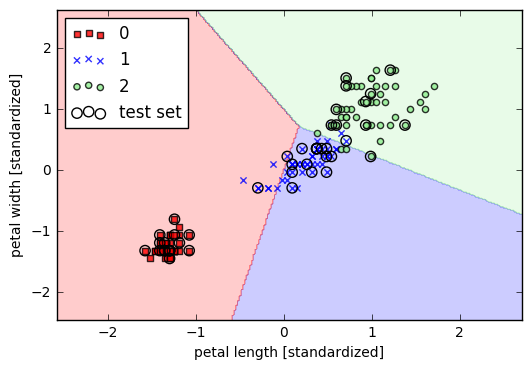

In [36]:
plt.contourf(xx1, xx2, Z, alpha = 0.2, cmap = cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
markers = ('s', 'x', 'o', '^', 'v')

X_combined_std_test, y_combined_test = X_combined_std[range(105, 150), :], y_combined[range(105, 150)]
for idx, cl in enumerate(np.unique(y_combined)):
    plt.scatter(x = X_combined_std[y_combined == cl, 0],
               y = X_combined_std[y_combined == cl, 1],
                alpha = 0.8, c = cmap(idx),
                marker = markers[idx], label = cl)

# highlight test samples

plt.scatter(X_combined_std_test[:, 0], X_combined_std_test[:, 1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


In [40]:
def plot_decision_regions(X, y, classifier, 
                          test_idx=None, resolution=0.02):
    
    # setup marker generator and color map

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
       
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
       
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o',
                    s=55, label='test set')
        

## 2. Modeling class probabilities via logistic regression

### 1) Logistic regression intuition and conditional probabilities

In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [43]:
z = np.arange(-7, 7, 0.1)
z

array([ -7.00000000e+00,  -6.90000000e+00,  -6.80000000e+00,
        -6.70000000e+00,  -6.60000000e+00,  -6.50000000e+00,
        -6.40000000e+00,  -6.30000000e+00,  -6.20000000e+00,
        -6.10000000e+00,  -6.00000000e+00,  -5.90000000e+00,
        -5.80000000e+00,  -5.70000000e+00,  -5.60000000e+00,
        -5.50000000e+00,  -5.40000000e+00,  -5.30000000e+00,
        -5.20000000e+00,  -5.10000000e+00,  -5.00000000e+00,
        -4.90000000e+00,  -4.80000000e+00,  -4.70000000e+00,
        -4.60000000e+00,  -4.50000000e+00,  -4.40000000e+00,
        -4.30000000e+00,  -4.20000000e+00,  -4.10000000e+00,
        -4.00000000e+00,  -3.90000000e+00,  -3.80000000e+00,
        -3.70000000e+00,  -3.60000000e+00,  -3.50000000e+00,
        -3.40000000e+00,  -3.30000000e+00,  -3.20000000e+00,
        -3.10000000e+00,  -3.00000000e+00,  -2.90000000e+00,
        -2.80000000e+00,  -2.70000000e+00,  -2.60000000e+00,
        -2.50000000e+00,  -2.40000000e+00,  -2.30000000e+00,
        -2.20000000e+00,

In [44]:
z.shape

(140,)

In [45]:
phi_z = sigmoid(z)
phi_z

array([  9.11051194e-04,   1.00677082e-03,   1.11253603e-03,
         1.22939862e-03,   1.35851995e-03,   1.50118226e-03,
         1.65880108e-03,   1.83293894e-03,   2.02532039e-03,
         2.23784852e-03,   2.47262316e-03,   2.73196076e-03,
         3.01841632e-03,   3.33480731e-03,   3.68423990e-03,
         4.07013772e-03,   4.49627316e-03,   4.96680165e-03,
         5.48629890e-03,   6.05980149e-03,   6.69285092e-03,
         7.39154134e-03,   8.16257115e-03,   9.01329865e-03,
         9.95180187e-03,   1.09869426e-02,   1.21284350e-02,
         1.33869178e-02,   1.47740317e-02,   1.63024994e-02,
         1.79862100e-02,   1.98403057e-02,   2.18812709e-02,
         2.41270214e-02,   2.65969936e-02,   2.93122308e-02,
         3.22954647e-02,   3.55711893e-02,   3.91657228e-02,
         4.31072549e-02,   4.74258732e-02,   5.21535631e-02,
         5.73241759e-02,   6.29733561e-02,   6.91384203e-02,
         7.58581800e-02,   8.31726965e-02,   9.11229610e-02,
         9.97504891e-02,

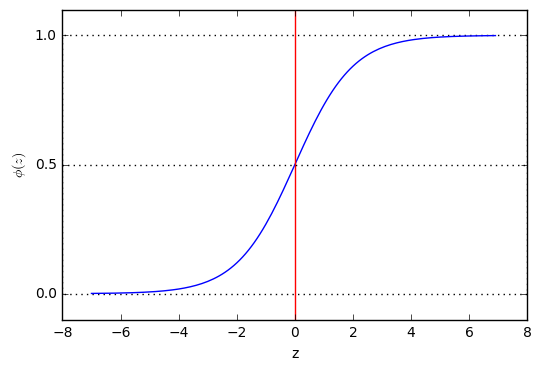

In [46]:
plt.plot(z, phi_z)
# vertical line
plt.axvline(0.0, color = 'r')
# horizontal span, alpha : 선 밝기, facecolor : 바탕 밝기 (0: 검은색 ~ 1: 흰색)
plt.axhspan(0.0, 1.0, facecolor = '1.0', alpha = 1.0, ls = 'dotted')
# horizontal line
plt.axhline(y = 0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

### 2) Learning the weights of the logistic cost function

### 3) Training a logistic regression model with scikit-learn

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000.0, random_state = 0) # parameter C?
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

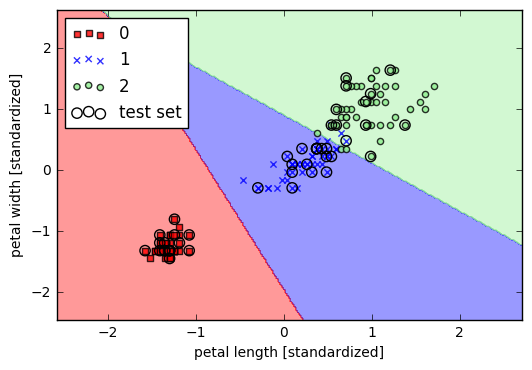

In [48]:
plot_decision_regions(X_combined_std, y_combined,
                     classifier = lr,
                     test_idx = range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

In [49]:
lr.predict_proba(X_test_std[0,:])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

- The model predicts a chance of **93.7 percent that the sample belongs to the Iris-Virginica class, and a 6.3 percent chance that the sample is a Iris-Versicolor flower**.

### 4) Tackling overfitting via regularization

- One way of finding a good bias-variance tradeoff is to tune the complexity of the model via **regularization**

- Regularization is a very useful method to **handle collinearity (high correlation among features), filter out noise from data**, and eventually prevent overfitting

In [51]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C = 10**c, random_state = 0)
    lr.fit(X_train_std, y_train)
    print(lr.coef_[1])
    weights.append(lr.coef_[1])
    params.append(10**c)

[  6.55979672e-05   3.27209902e-05]
[ 0.00065369  0.00032495]
[ 0.00631937  0.00303439]
[ 0.04881993  0.01620922]
[ 0.23882448 -0.06648319]
[ 1.06011115 -0.84154482]
[ 2.19190886 -1.98265142]
[ 2.50582212 -2.30336729]
[ 2.54373335 -2.3421979 ]
[ 2.54760621 -2.34616582]


In [144]:
weights

[array([  6.55979672e-05,   3.27209902e-05]),
 array([ 0.00065369,  0.00032495]),
 array([ 0.00631937,  0.00303439]),
 array([ 0.04881993,  0.01620922]),
 array([ 0.23882448, -0.06648319]),
 array([ 1.06011115, -0.84154482]),
 array([ 2.19190886, -1.98265142]),
 array([ 2.50582212, -2.30336729]),
 array([ 2.54373335, -2.3421979 ]),
 array([ 2.54760621, -2.34616582])]

In [145]:
params

[1.0000000000000001e-05,
 0.0001,
 0.001,
 0.01,
 0.10000000000000001,
 1,
 10,
 100,
 1000,
 10000]

In [146]:
lr.coef_

array([[-9.38725178, -8.62196104],
       [ 2.54760621, -2.34616582],
       [ 9.8260878 ,  6.51345035]])

[[  6.55979672e-05   3.27209902e-05]
 [  6.53690140e-04   3.24948619e-04]
 [  6.31936684e-03   3.03439293e-03]
 [  4.88199280e-02   1.62092216e-02]
 [  2.38824476e-01  -6.64831864e-02]
 [  1.06011115e+00  -8.41544819e-01]
 [  2.19190886e+00  -1.98265142e+00]
 [  2.50582212e+00  -2.30336729e+00]
 [  2.54373335e+00  -2.34219790e+00]
 [  2.54760621e+00  -2.34616582e+00]]


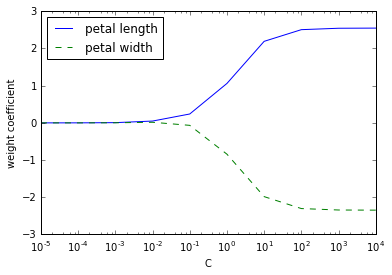

In [147]:
weights = np.array(weights)
print(weights)

plt.plot(params, weights[:,0], label = 'petal length')
plt.plot(params, weights[:,1], linestyle = "--", label = 'petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

## 3. Maximum margin classification with support vector machines

### 1) Dealing with the nonlinearly separable case using slack variables

In [52]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1.0, random_state = 0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

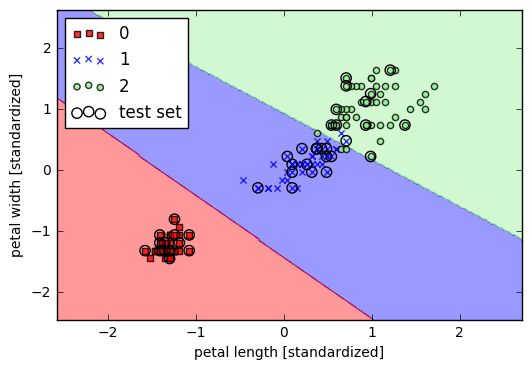

In [54]:
plot_decision_regions(X_combined_std,
                     y_combined, classifier = svm,
                     test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

### 2) Solving nonlinear problems using a kernel SVM

#### nonlinear classification problem

In [55]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)

In [56]:
X_xor

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [57]:
y_xor

array([False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,

In [58]:
y_xor = np.where(y_xor, 1, -1)
y_xor

array([-1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
        1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,
       -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1])

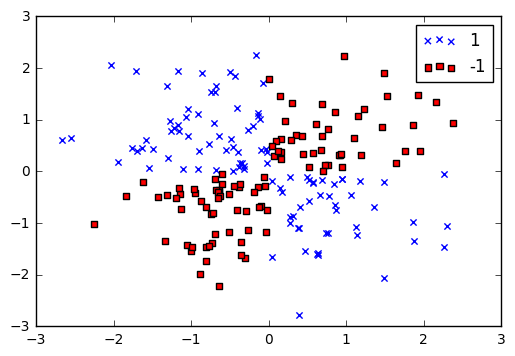

In [60]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
           c = 'b', marker = 'x', label = '1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],
           c = 'r', marker = 's', label = '-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

### 3) Using the kernel trick to find separating hyperplanes in higher dimensional space

In [61]:
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.10, C = 10.0)
svm.fit(X_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

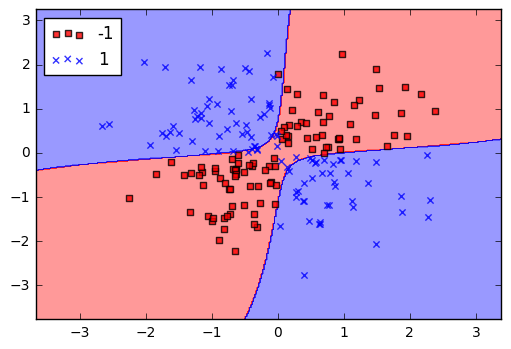

In [62]:
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.show()

#### gamma value에 따른 decision boundary 변화

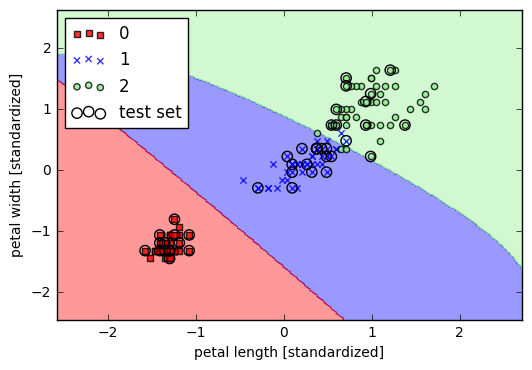

In [63]:
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.2, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, 
                     y_combined, classifier = svm, 
                     test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

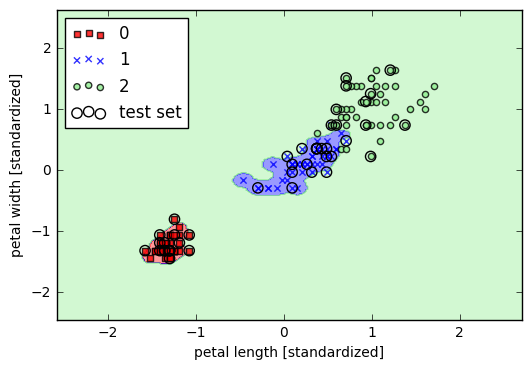

In [64]:
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 100.0, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, 
                     y_combined, classifier = svm, 
                     test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

- Decision boundary around the **classes 0 and 1 is much tighter using a relatively large value of gamma**

- Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data, which illustrates that the optimization of  also plays an important role in controlling overfitting.